In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Q1 - How to read and write images?

In [29]:
#Reading Images
img = cv2.imread('Images/img1.jpeg',cv2.IMREAD_COLOR)
img = cv2.resize(img,(600,700))

# Displaying image
cv2.imshow('Original Image',img)

# Writing on image : Drawing rectangle over image
imgRec = cv2.rectangle(img, (5,5), (590,690),(0,255,255),2) 
cv2.imshow('Image with rectangle',imgRec)

# press q to exit
if cv2.waitKey(0)&0xff == ord('q'):
    cv2.destroyAllWindows()

#Writing Images to file
cv2.imwrite('Images/Q1-SavedImage.jpeg',img)

True

## Q2 - How to convert an image from RGB format to Gray format? 

In [77]:
## Reading Imagecv2.imread?
img = cv2.imread('Images/img1.jpeg')
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

## converting to image to gray from RGB
grayImg = cv2.cvtColor(RGBImg,cv2.COLOR_RGB2GRAY)

# Displaying image
cv2.imshow('Original Image',img)
cv2.imshow('Gray Image',grayImg)


# press q to exit
if cv2.waitKey(0)&0xff == ord('q'):
    cv2.destroyAllWindows()

## Q3 - How to access pixels of an image?

In [4]:
## To illustrate this we will convert given image to image having only blue pixels by manipulating image pixels

## Reading image
img = cv2.imread('Images/img1.jpeg')
img = cv2.resize(img,(600,600)) 
# converting to numpy array to manipulate pixel values
imgArray = np.array(img,copy=True)  

## Displaying size of image
print("Shape of image array : {}".format(imgArray.shape))

## Manipulating Pixel value
imgArray[:,:,1:] = 0
    
# Displaying image
cv2.imshow('Original Image',img)
cv2.imshow('Image with non-zero pixel values in Blue Channel',imgArray)


# press q to exit
if cv2.waitKey(0)&0xff == ord('q'):
    cv2.destroyAllWindows()

Shape of image array : (600, 600, 3)


## Q4 - Convert an image into its negative.

In [8]:
## Reading Imagecv2.imread?
img = cv2.imread('Images/img1.jpeg')
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #opencv default image format is BGR ( so converting it to RGB format)

## converting to image to its negative
negativeImg = (255-RGBImg) # negativeImg = cv2.bitwise_not(RGBImg)

# Displaying image
cv2.imshow('Original Image',img)
cv2.imshow('Image with non-zero pixel values in Blue Channel',negativeImg)


# press q to exit
if cv2.waitKey(0)&0xff == ord('q'):
    cv2.destroyAllWindows()

## Q5 - Perform thresholding function on an image.

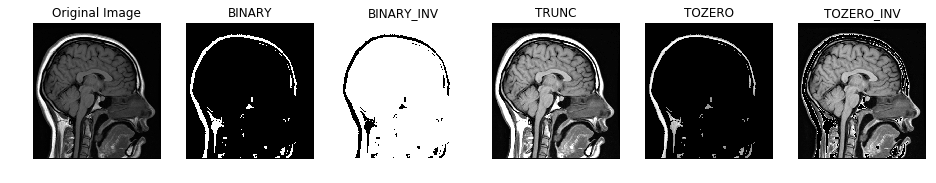

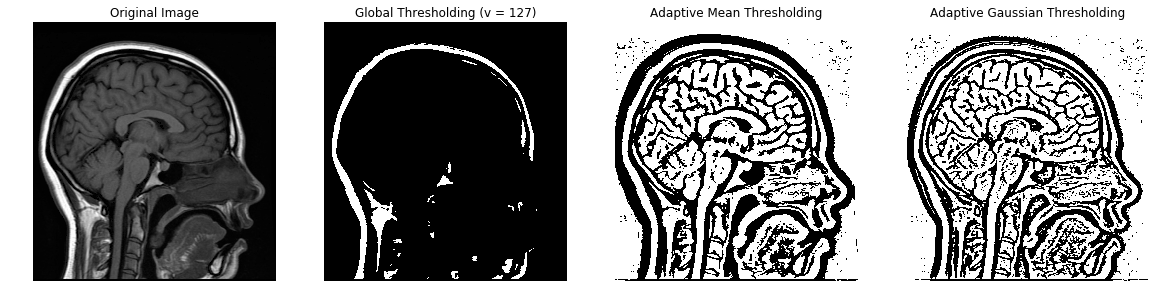

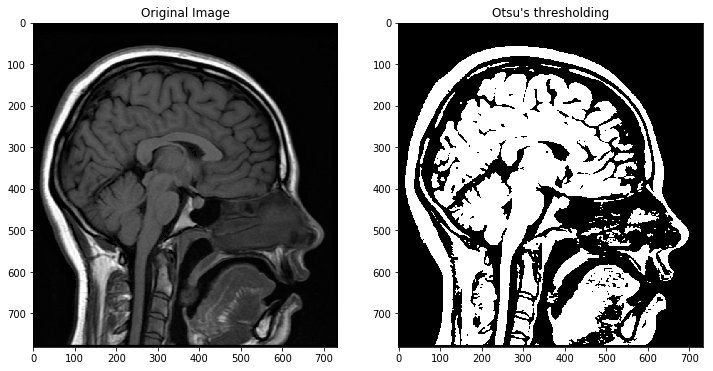

In [55]:
## Simple Thresholding functions

img = cv2.imread('Images/img2.png',0)
ret,img1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,img2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,img3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,img4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,img5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, img1, img2, img3, img4, img5]

plt.figure(figsize=(16,16))
for i in range(6):
    plt.subplot(1,6,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


## Adaptive thresholding
image = cv2.imread('Images/img2.png',0)
ret,image1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
image2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,45,2)
image3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,45,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, image1, image2, image3]
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


# Otsu's thresholding

ret,img1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(img1,'gray')
plt.title("Otsu's thresholding")
plt.show()

## Q6 - Perform log tranformation on an image.

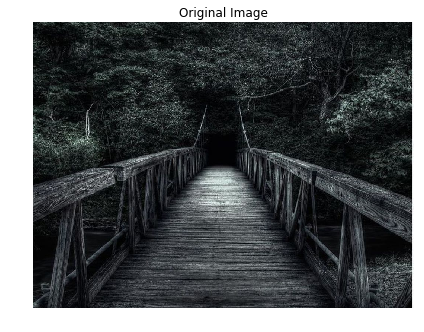

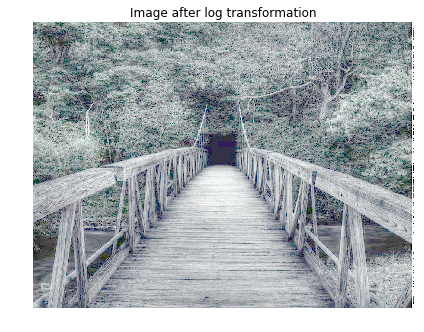

In [73]:
# reading image
img = cv2.imread('Images/img4.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Applying log transform
imgLog = (np.log(img+1)/(np.log(1+np.max(img))))*255 #img_log = T(img) = c*log(1+r)  ; c = 255/(log(1 + max_input_pixel_value))
imgLog = np.array(imgLog,dtype=np.uint8)

# Utility function to display image
def plot(img,title='Original Image'):
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

    
plot(img)
plot(imgLog,title="Image after log transformation")

## Q7 - Perform Contrast Stretching.

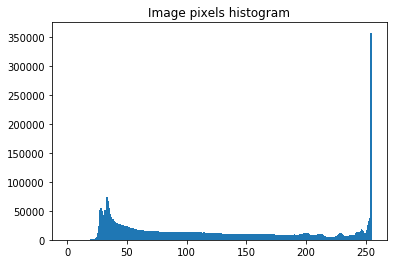

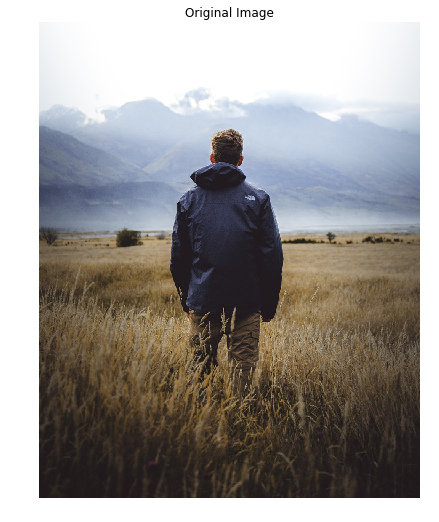

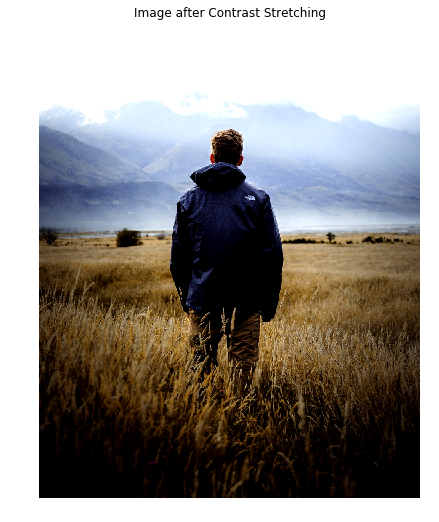

In [91]:
def contrastStretching(img):
    a = 0
    b = 255
    plt.hist(img.ravel(),256)
    plt.title('Image pixels histogram')
    plt.show()
    c=np.percentile(img,20)  # 5th percentile
    d=np.percentile(img,80) # 95th percentile

    # performing contrast stretching
    newImg = (b-a)*((img-c)/(d-c))+a
    newImg[newImg>255]=255
    newImg[newImg<0]=0
    return np.array(newImg,dtype='uint8')
    
# Utility function to display image
def plot(img,title='Original Image'):
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# reading image
img = cv2.imread('Images/img1.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# calling function to perform contrast Stretching
newImg = contrastStretching(img)

plot(img)
plot(newImg,'Image after Contrast Stretching')

## Q8 - Perform intensity slicing.

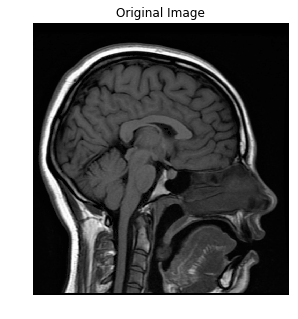

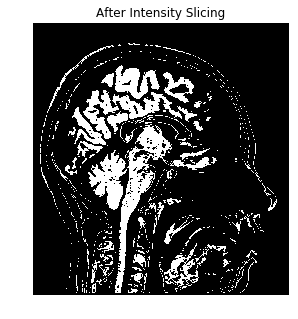

In [5]:
# Reading Image
img = cv2.imread('Images/img2.png', 0)
# Getting th shape of the image
row,col = img.shape
# Making an array with same shape as img and all pixel values initialized to zeros
outputImg = np.zeros((row,col),dtype='uint8')

# seeting min and max intensity for slicing
min_intensity=70
max_intensity=90

# looping over the original img to intensity slice
for i in range(row):
    for j in range(col):
        if img[i,j]>min_intensity and img[i,j]<max_intensity:
            outputImg[i,j]=255
        else:
            outputImg[i,j]=0
                        
# Utility function to display image 
def plot(img,title='Original Image'):
    plt.figure(figsize=(5,5))
    plt.imshow(img,'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot(img)    
plot(outputImg,'After Intensity Slicing')

## Q9 - Perform power law transformation.

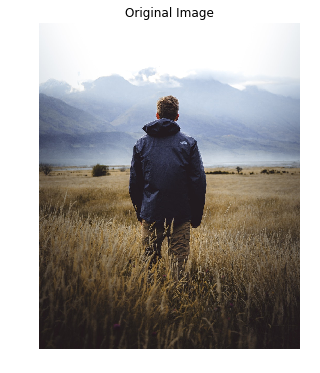

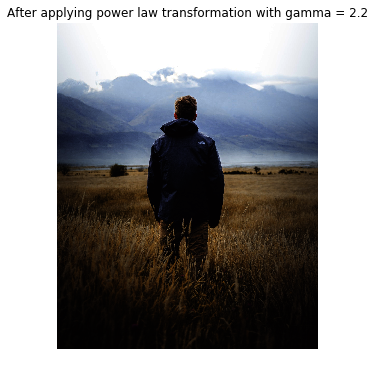

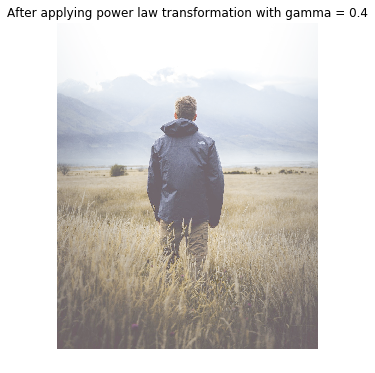

In [7]:
# Reading image
img = cv2.imread('Images/img1.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Power Law Transformation with Gamma=2.2 
PLTImg1 = np.array(255*(img/255)**2.2,dtype='uint8')

# Power Law Transformation with Gamma=0.4 
PLTImg2 = np.array(255*(img/255)**0.4,dtype='uint8')

# Utility function to display image 
def plot(img,title='Original Image'):
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

plot(img)    
plot(PLTImg1,'After applying power law transformation with gamma = 2.2')
plot(PLTImg2,'After applying power law transformation with gamma = 0.4')

## Q10 - Perform Bit Plane Slicing.

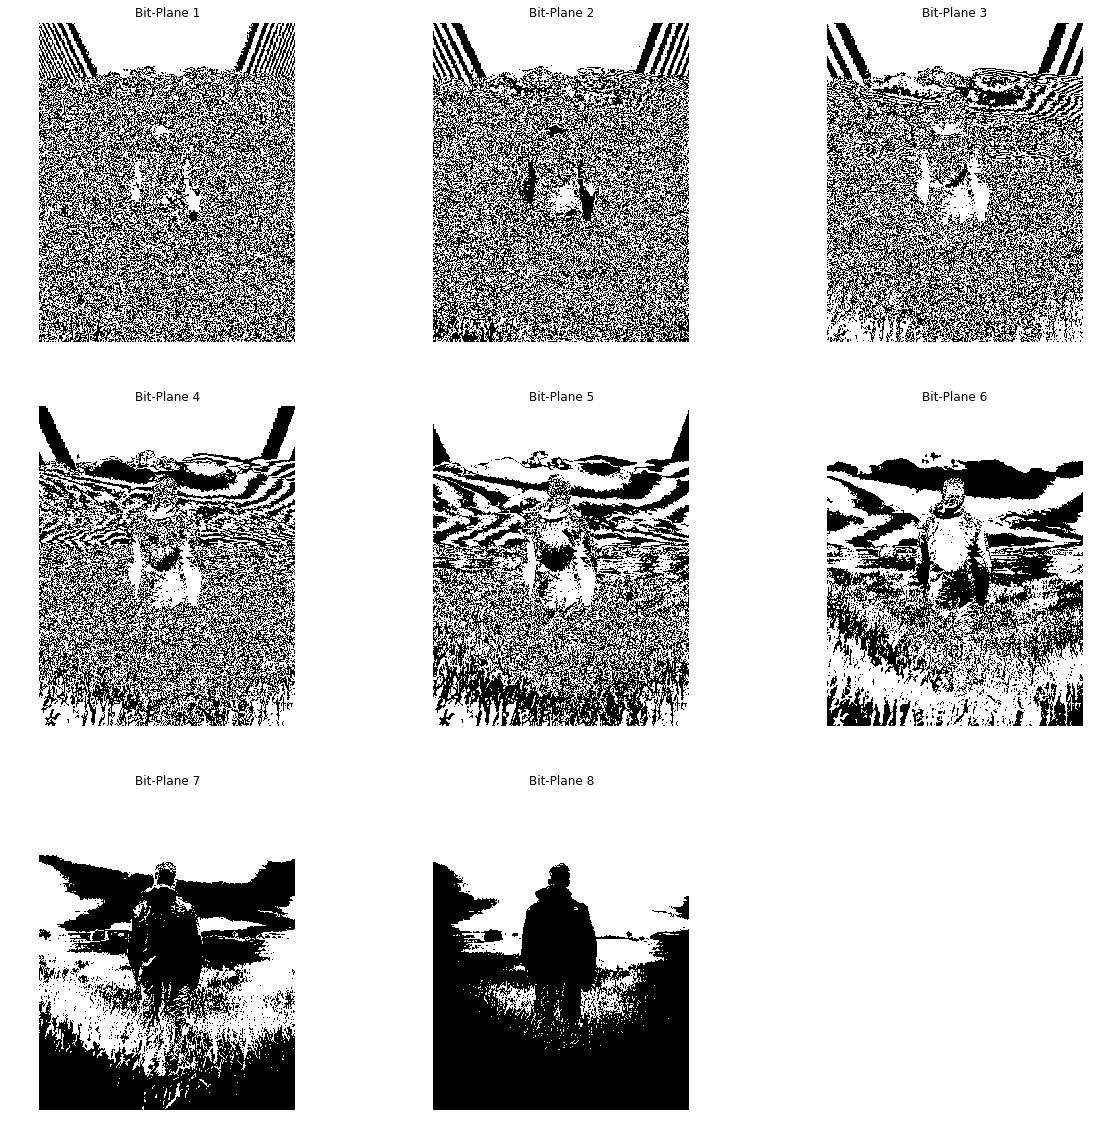

In [14]:
img = cv2.imread('Images/img1.jpeg', 0) 

bit_planes = []

for i in range(0, 8):
    plane = np.full((img.shape[0], img.shape[1]), 2 ** i, np.uint8)
    # executing bitwise AND operation
    res = cv2.bitwise_and(plane, img)
    x = res * 255
    bit_planes.append(x)

plt.figure(figsize=(20,20))
for i in range(8):
    plt.subplot(3,3,i+1),plt.imshow(bit_planes[i],'gray')
    plt.title("Bit-Plane {}".format(i+1))
    plt.axis('off')
plt.show()